In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('/content/placement.csv')

In [25]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [27]:
df.shape

(100, 4)

In [28]:
df = df.iloc[:,1:]

In [30]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [31]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [32]:
import matplotlib.pyplot as plt


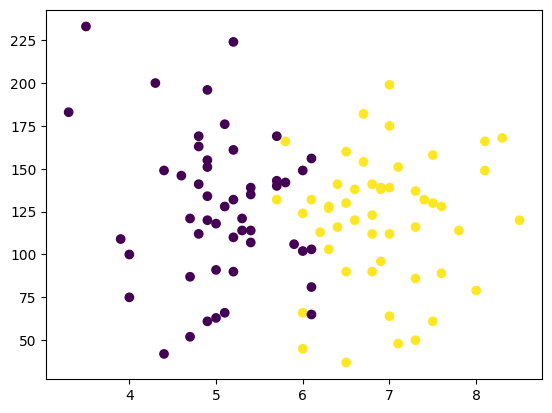

In [33]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [34]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [35]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [36]:
y.shape

(100,)

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [38]:
X_train

,cgpa,iq
80,4.9,196.0
12,5.4,139.0
81,5.4,107.0
84,5.7,169.0
44,7.5,61.0
...,...,...
83,7.5,130.0
0,6.8,123.0
33,6.0,149.0
11,6.9,138.0


In [39]:
y_train

,placement
80,0
12,0
81,0
84,0
44,1
...,...
83,1
0,1
33,0
11,1


In [40]:
X_test

,cgpa,iq
5,7.1,48.0
98,6.3,103.0
53,8.3,168.0
93,6.8,112.0
59,4.8,112.0
58,8.0,79.0
9,5.1,66.0
22,4.9,120.0
30,7.6,128.0
75,4.8,169.0


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_train

array([[-0.94632894,  1.78666178],
       [-0.49521875,  0.35162578],
       [-0.49521875, -0.45400847],
       [-0.22455263,  1.10690788],
       [ 1.39944407, -1.61210769],
       [-0.67566283,  2.49159174],
       [-1.39743914, -2.09045303],
       [ 1.21899999, -1.88904446],
       [-1.21699506,  0.52785827],
       [ 0.67766776,  1.4341968 ],
       [ 0.49722368, -0.88200166],
       [-0.94632894,  0.22574543],
       [ 1.21899999,  0.30127364],
       [ 0.94833388,  1.25796431],
       [ 0.58744572,  0.32644971],
       [ 0.94833388,  0.35162578],
       [-1.03655098,  0.95585146],
       [-2.20943749,  2.71817637],
       [-0.04410855, -0.47918454],
       [ 0.40700164,  0.40197792],
       [-0.94632894,  0.65373862],
       [ 0.58744572, -0.12671955],
       [-0.94632894,  0.7544429 ],
       [-0.22455263,  0.45233006],
       [ 1.21899999, -0.22742383],
       [-0.94632894, -1.61210769],
       [-1.75832729, -0.63024096],
       [ 1.39944407,  0.82997111],
       [-0.67566283,

In [45]:
X_test = scaler.transform(X_test)

In [46]:
X_test

array([[ 1.03855592, -1.9393966 ],
       [ 0.3167796 , -0.55471275],
       [ 2.12122038,  1.08173181],
       [ 0.7678898 , -0.32812811],
       [-1.03655098, -0.32812811],
       [ 1.85055427, -1.15893843],
       [-0.76588486, -1.48622734],
       [-0.94632894, -0.12671955],
       [ 1.48966611,  0.07468901],
       [-1.03655098,  1.10690788]])

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression()

In [49]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = clf.predict(X_test)

In [51]:
y_test

,placement
5,1
98,1
53,1
93,1
59,0
58,1
9,0
22,0
30,1
75,0


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)

1.0

In [54]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

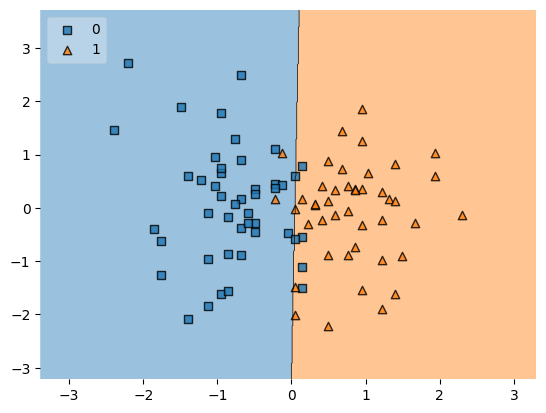

In [55]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [56]:
import pickle

In [57]:
pickle.dump(clf,open('model.pkl','wb'))